# MCA Analysis

We will try using multiple correspondance analysis as dimensionality reduction 

In [1]:
import prince
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
merged = pd.read_csv('../../DataPlus/feature_dataframe.csv')

### Prepare for MCA

In [3]:
cat_vars = ['white_binary', 'edu_binary', 'gleason', 'marry_binary', 'Advice1']

In [10]:
# series of txgot_binary values
def txgot_helper(x):
    if np.isnan(x):
        return 3
    else:
        return x

temp_col = merged[cat_vars + ['txgot_binary']].dropna(subset=cat_vars)['txgot_binary']
txgot_col = temp_col.map(txgot_helper)

In [5]:
df = merged[cat_vars].dropna(subset=cat_vars)

In [6]:
mca_config = prince.MCA(
    n_components=2,
    n_iter=3,
    copy=True,
    engine='auto',
    random_state=42
)

### Run MCA and Visualize

In [7]:
mca = mca_config.fit(df)

In [8]:
mca_df = mca.row_coordinates(df)
mca.row_coordinates(df).head()

,0,1
0,-0.064614,0.571641
1,-0.064614,0.571641
2,-0.271138,-0.180039
3,0.082168,0.641596
4,0.593752,0.106059


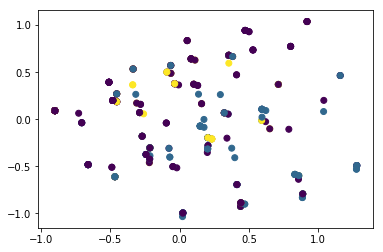

In [11]:
plt.scatter(mca_df[mca_df.columns[0]], mca_df[mca_df.columns[1]], c=txgot_col)

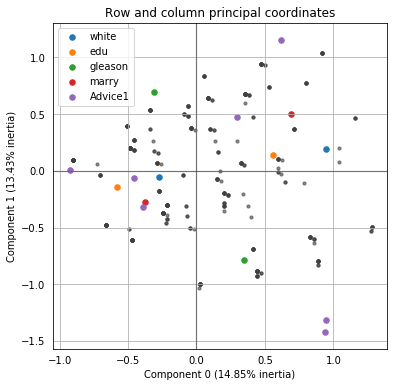

In [12]:
ax = mca.plot_coordinates(
    X=df,
    ax=None,
    figsize=(6,6),
    show_row_points=True,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=False,
    legend_n_cols=1
)

Not really sure how to interpret this graph